# Projektna naloga: Analiza uspešnosti študentov

Avtor: Samo Pungaršek Pritržnik

## Cilj raziskave

Pri projektu bom analiziral podatke uspešnosti študentov iz dveh portugalskih šol. Predvsem me bo zanimalo kakšne so povezave med lastnostmi študentov, njihovimi okoliščinami in uspešnostjo na šoli.

Cilji so naslednji:
- Povezava med številom preteklih neuspehov in končno oceno predmeta.
- Povezava med tem ali je študent v romantični zvezi in številom preteklih neuspehov.
- Povezava med končno oceno predmeta in ali si študent želi višjo izobrazbo.
- Analiza podatkov za napovedovanje končne ocene predmeta.

## Podatki

[Podatke](https://www.kaggle.com/datasets/devansodariya/student-performance-data) sem pridobil iz spletne strani [Kaggle](https://www.kaggle.com). Podatki so zbrani iz predmeta matematika.

Podatki so porazdeljeni na stolpce in vrstice. Stolpec predstavlja atribut za vse študente, vrstica pa študenta in njegove atribute. Imamo 32 stolpcev in 396 vrstic.

### Lastnosti podatkov

Lastnosti so naslednje:
  1. school -> študentova šola (binearno: 'GP' - fakulteta Gabriel Pereira; 'MS' - Moushino da Silveira)
  2. sex -> študentov spol (binarno: 'F' - ženski; 'M' - moški)
  3. age -> študentova starost (numerično: od 15 pa do 22)
  4. address -> tip študentovega naslova (binarno: 'U' - mestni; 'R' - podeželjski)
  5. famsize -> velikost družine (binarno: 'LE3' - manj kot 3; 'GT3' - več kot 3)
  6. Pstatus -> ali starša živita skupaj (binarno: 'T' - živita skupaj; 'A' - živita narazen)
  7. Medu -> mamina stopnja izobrazbe (numeric: 0 - nič; 1 - primarna izobrazba do 4 razreda; 2 - končana primarna izobrazba; 3 - sekundarna izobrazba; 4 - višja izobrazba)
  8. Fedu -> očetova stopnja izobrazbe (numeric: 0 - nič; 1 - primarna izobrazba do 4 razreda; 2 - končana primarna izobrazba; 3 - sekundarna izobrazba; 4 - višja izobrazba)
  9. Mjob -> mamina služba (nominalno: 'teacher' - pedagogika; 'health' - delo v zdravstvu; 'services' - delo v javnem sektorju; 'at_home' - delo od doma; 'other' - drugo)
  10. Mjob -> očetova služba (nominalno: 'teacher' - pedagogika; 'health' - delo v zdravstvu; 'services' - delo v javnem sektorju; 'at_home' - delo od doma; 'other' - drugo)
  11. reason -> razlog izbire šole (nominalno: 'home' - bližina prebivališča; 'reputation' - ugled šole; 'course' - zanimivost predmetov; 'other' - drugo)
  12. guardian -> študentov skrbnik (nominalno: 'mother'; 'father'; 'other')
  13. traveltime -> čas potovanja od doma do šole (numerično: 1 - <15 min; 2 - 15 do 30 min; 3 - 30 min do 1 ure; 4 - >1 ura)
  14. studytime -> tedenski čas učenja (numerično: 1 - <2 uri; 2 - 2 do 5 ur; 3 - 5 do 10 ur; 4 - >10 ur)
  15. failures -> število preteklih neuspehov (numerično: n če 1<=n<3, če ne 4)
  16. schoolsup -> dodatna pomoč pri učenju (binarno: yes ali pa no)
  17. famsup -> družinska pomoč pri učenju (binarno: yes ali pa no)
  18. paid -> plačane inštrukcije v danem predmetu (binarno: yes ali pa no)
  19. activities -> izven šolske aktivnosti (binarno: yes ali pa no)
  20. nursery -> ali je študent obiskoval vrtec (binarno: yes ali pa no)
  21. higher -> ali si študent želi višjo izobrazbo (binarno: yes ali pa no)
  22. internet -> ali ima študent internetni dostop doma (binarno: yes ali pa no)
  23. romantic -> ali je v romantični zvezi (binarno: yes ali pa no)
  24. famrel -> kvaliteta družinskih odnosov (numeric: od 1 (zelo slabo) do 5 (zelo dobro))
  25. freetime -> prosti čas po šoli (numeric: od 1 (zelo malo) do 5 (zelo veliko))
  26. goout -> preživljeni čas s prijatelji (numeric: od 1 (zelo malo) do 5 (zelo veliko))
  27. Dalc -> uživanje alkohola med šolskimi dnevi (numeric: od 1 (zelo malo) do 5 (zelo veliko))
  28. Walc -> uživanje alkohola med vikendom (numeric: od 1 (zelo malo) do 5 (zelo veliko))
  29. health -> trenutni zdravstveno stanje (numeric: od 1 (zelo slabo) do 5 (zelo dobro))
  30. absences -> število šolskih izostankov (numeric: od 0 do 93)
  31. G1 -> ocena prvega semestra (numeric: od 0 do 20)
  32. G2 -> ocena drugega semestra (numeric: od 0 do 20)
  33. G3 -> končna ocena predmeta (numeric: od 0 do 20)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Pregled podatkov

In [2]:
%store -r data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Analiza povprečnih ocen študentov glede na poklic staršev

Podatke sem najprej analiziral glede na poklic staršev. Povprečne ocene študentov so prikazane na spodnjem grafu. Podatke sem združil glede na poklic očeta in matere. Na grafu je razvidno, da so študenti, katerih starši so zaposleni v zdravstvu, najbolj uspešni. Sledijo jim študenti, katerih starši so zaposleni v javnem sektorju. Najmanj uspešni so študenti, katerih starši so zaposleni od doma.

Text(0.5, 1.0, 'Povprečna ocena glede na poklic staršev')

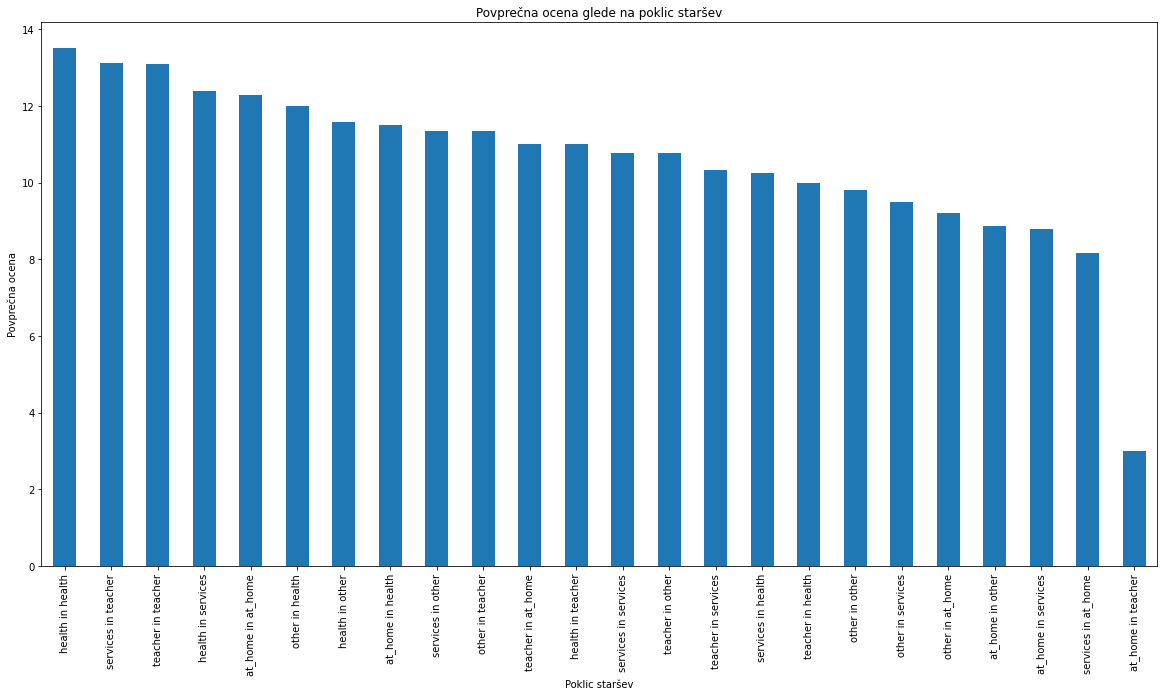

In [3]:
%store -r job

plt.figure(figsize=(20,10))
job.plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Poklic staršev')
plt.title('Povprečna ocena glede na poklic staršev')


### Analiza povprečnih ocen študentov glede na število preteklih neuspehov

Text(0.5, 1.0, 'Povprečna ocena glede na število neuspehov')

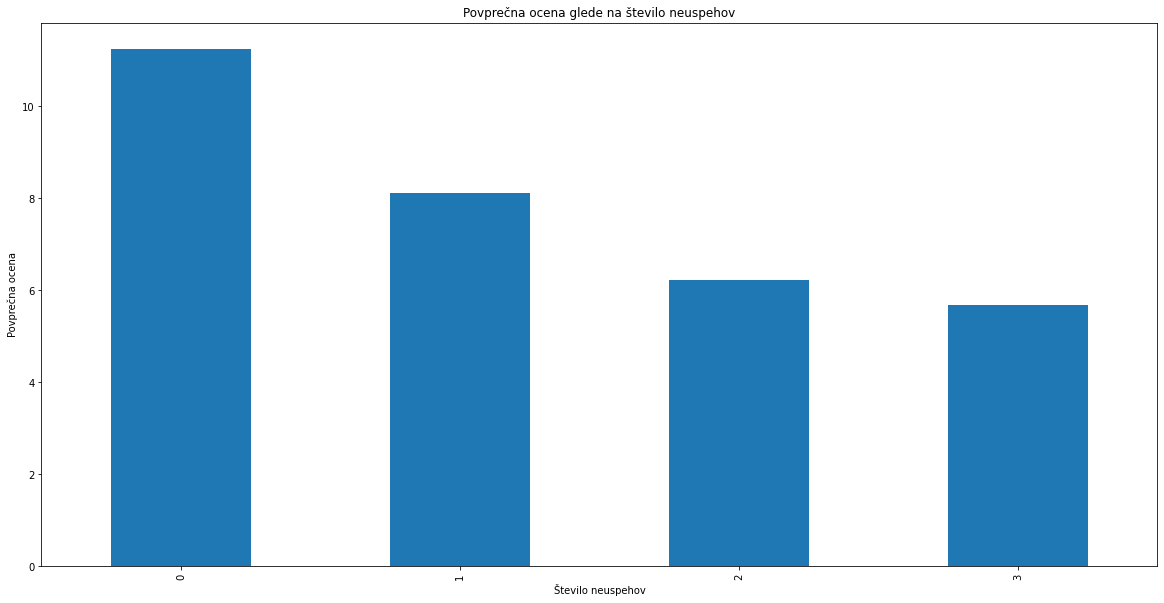

In [9]:
%store -r failiures

plt.figure(figsize=(20,10))
failiures.plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Število neuspehov')
plt.title('Povprečna ocena glede na število neuspehov')

Na grafu je razvidno, da so študenti, kateri nimajo preteklih neuspehov, najbolj uspešni. Sledijo jim študenti, kateri imajo en neuspeh. Najmanj uspešni so študenti, kateri imajo dva ali več neuspehov.

### Analiza števila neuspešnih let glede na romantično zvezo

Text(0.5, 1.0, 'Število neuspešnih let glede na romantično zvezo')

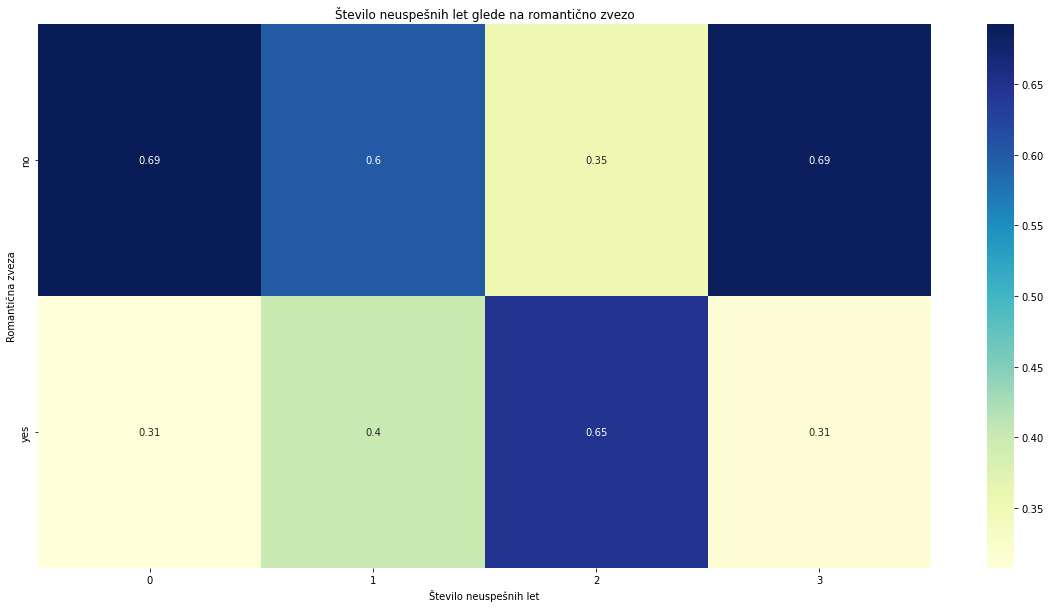

In [12]:
%store -r ct

plt.figure(figsize=(20,10))
plt.ascending = True
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.ylabel('Romantična zveza')
plt.xlabel('Število neuspešnih let')
plt.title('Število neuspešnih let glede na romantično zvezo')


Iz grafa je razvidno da večina študentov, ki ima nič neuspešnih let ni v romantični zvezi. Sledijo jim študenti, ki imajo eno neuspešno leto. Teh je še zmeraj več, ki niso v romantični zvezi, a se je delež študentov pomanjšu glede na študente, ki nimajo neuspešnih let. Študenti, ki imajo dve neuspešni leti so večinoma v romantični zvezi. Študenti, ki imajo tri neuspešna leta so pa ni skoraj noben v romantični zvezi.

Iz tega nemoremo sklepati da je romantična zveza vzrok za neuspešna leta, saj je študentov, ki niso v romantični zvezi več kot študentov, ki so v romantični zvezi.

### Analiza ocen študentov glede na spol

Text(0.5, 1.0, 'Povprečna ocena glede na spol')

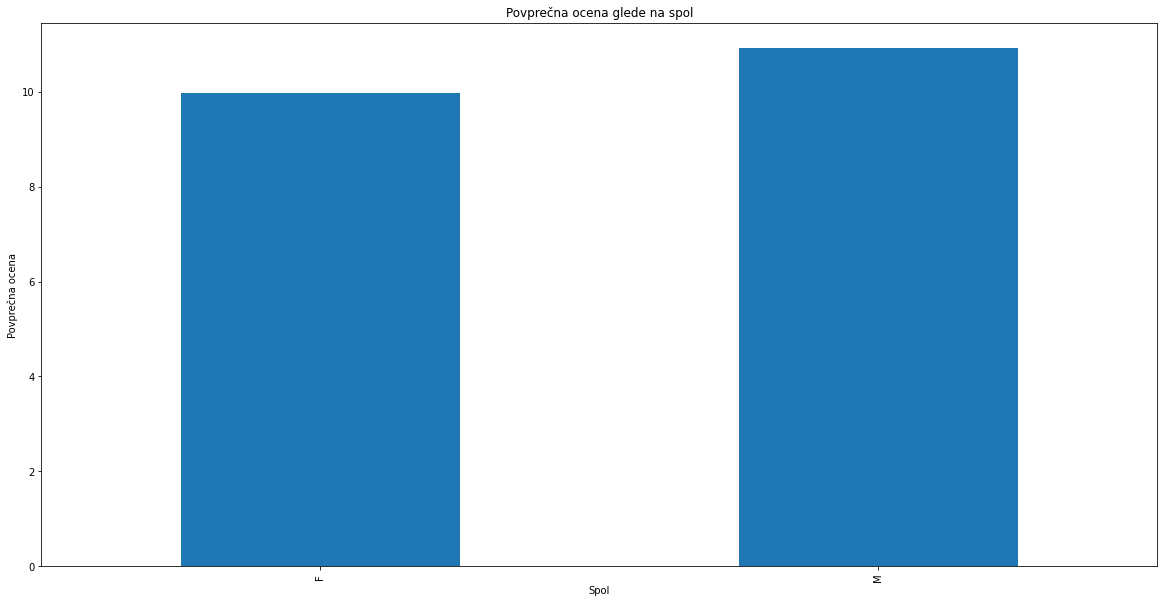

In [13]:
plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('sex')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Spol')
plt.title('Povprečna ocena glede na spol')

Iz grafa je razvidno da so študenti moškega spola bolj uspešni kot študentke ženskega spola. Študenti moškega spola imajo povprečno oceno 11.5, študentke ženskega spola pa 10.5. 

Za pojasnitev razlike v povprečnih ocenah med spoloma, kjer so moški v povprečju dosegli večjo razliko, je potrebno dodatno analizirati podatkovni set in upoštevati druge spremenljivke, ki bi lahko prispevale k tej razliki. 

### Analiza ocen študentov glede na to ali si želijo višjo izobrazbo

Text(0.5, 1.0, 'Povprečna ocena glede na željo po nadaljevanju šolanja')

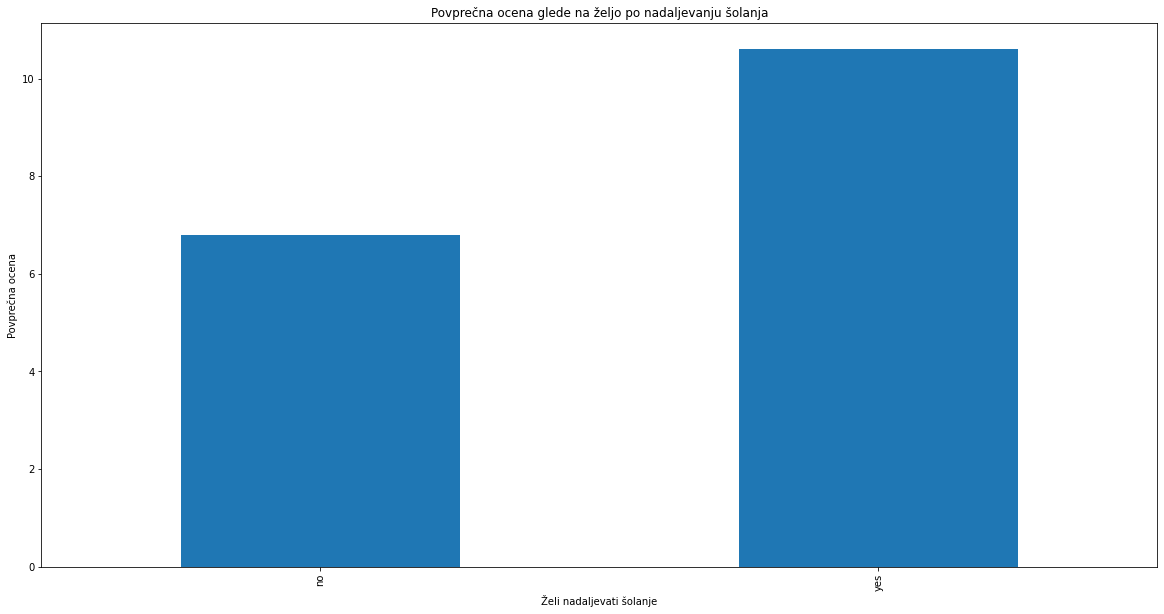

In [14]:
%store -r higher

plt.figure(figsize=(20,10))
higher.plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Želi nadaljevati šolanje')
plt.title('Povprečna ocena glede na željo po nadaljevanju šolanja')

Analiza podatkov razkriva, da študentje, ki dosegajo višje ocene, kažejo večjo željo po nadaljnji izobrazbi. Ta ugotovitev nakazuje na povezavo med uspehom pri študiju in ambicijami po izobraževanju.

Večje zanimanje za nadaljnjo izobrazbo med študenti z višjimi ocenami lahko izhaja iz več dejavnikov. Prvič, dosežki v šoli lahko krepijo samozavest in vero v lastne sposobnosti, kar spodbuja željo po nadaljnjem izobraževanju. Poleg tega lahko študenti z višjimi ocenami razumejo pomen izobraževanja kot ključnega dejavnika pri kariernem napredku in večjih možnostih zaposlitve v prihodnosti.

### Analiza povezave med zaužitjem alkohola med tednom in ocenami študentov

Text(0.5, 1.0, 'Povprečna ocena glede na količino popitega alkohola')

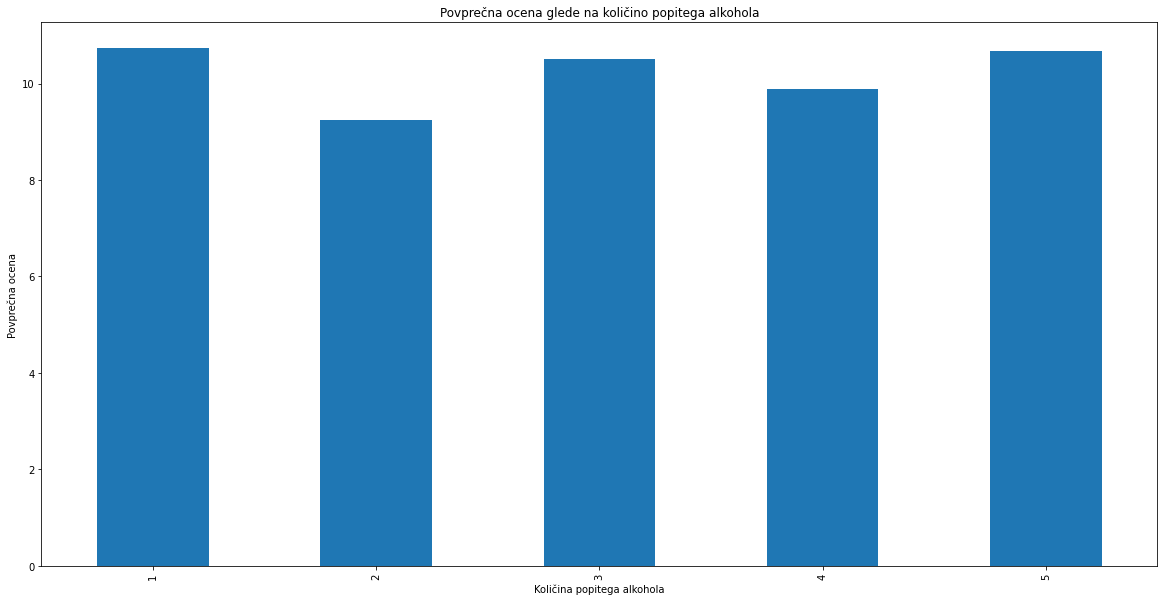

In [15]:
%store -r alcohol

plt.figure(figsize=(20,10))
alcohol.plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Količina popitega alkohola')
plt.title('Povprečna ocena glede na količino popitega alkohola')


Količina popitega alkohola je razdeljena na 5 razredov, kjer 1 pomeni zelo malo popitega alkohola, 5 pa zelo veliko popitega alkohola. Iz grafa nemoremo sklepati kake povezave, saj je razporeditev ocen po razredih zelo podobna.

### Analiza povezave med družinskem življenjem in ocenami študentov

Text(0.5, 1.0, 'Povprečna ocena glede na družinske razmere')

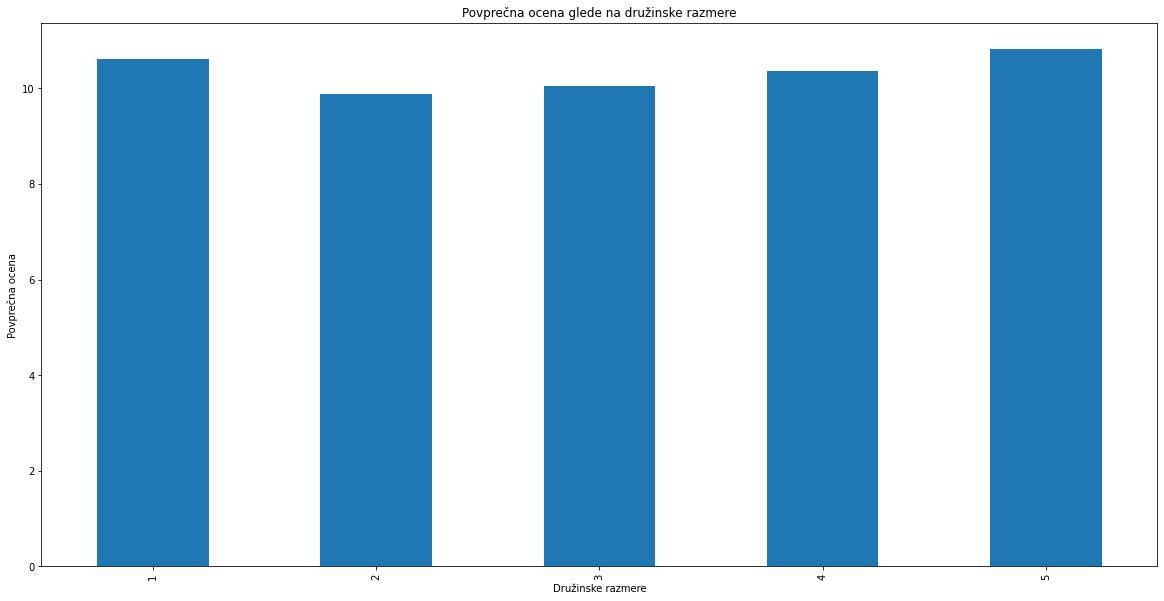

In [16]:
%store -r famrel

plt.figure(figsize=(20,10))
famrel.plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Družinske razmere')
plt.title('Povprečna ocena glede na družinske razmere')


Pri analizi atributa "famrel", ki označuje družinske odnose (kjer je vrednost 1 najslabša, 5 pa najboljša), opazimo zanimivo vzorec v povezavi s povprečno oceno. Ugotavljamo, da študenti s stopnjo družinskih odnosov ocenjeno kot najslabša (vrednost 1) dosegajo najvišjo povprečno oceno, medtem ko se povprečna ocena postopoma zmanjšuje pri študentih s stopnjami družinskih odnosov ocenjenimi kot 2 in nato narašča do najvišje stopnje (vrednost 5).

Ta rezultat je lahko presenetljiv in kaže na morebitno nasprotje med pričakovanimi vzorci. Možno je, da študenti z nižjo oceno za družinske odnose, ki jih ocenjujejo kot slabše, v resnici uspevajo pri šolskem delu zaradi drugih dejavnikov, kot so motivacija za izboljšanje razmer, večja osredotočenost na študij kot beg od težavnih družinskih okoliščin ali iskanje podpore v šoli.

Vendar je treba opozoriti, da so podatki zgolj opisni in ne zagotavljajo nujno vzročne povezave med atributom "famrel" in povprečno oceno.

### Analiza med razlogom izbire šole in ocenami študentov

Text(0.5, 1.0, 'Povprečna ocena glede na razlog za izbiro šole')

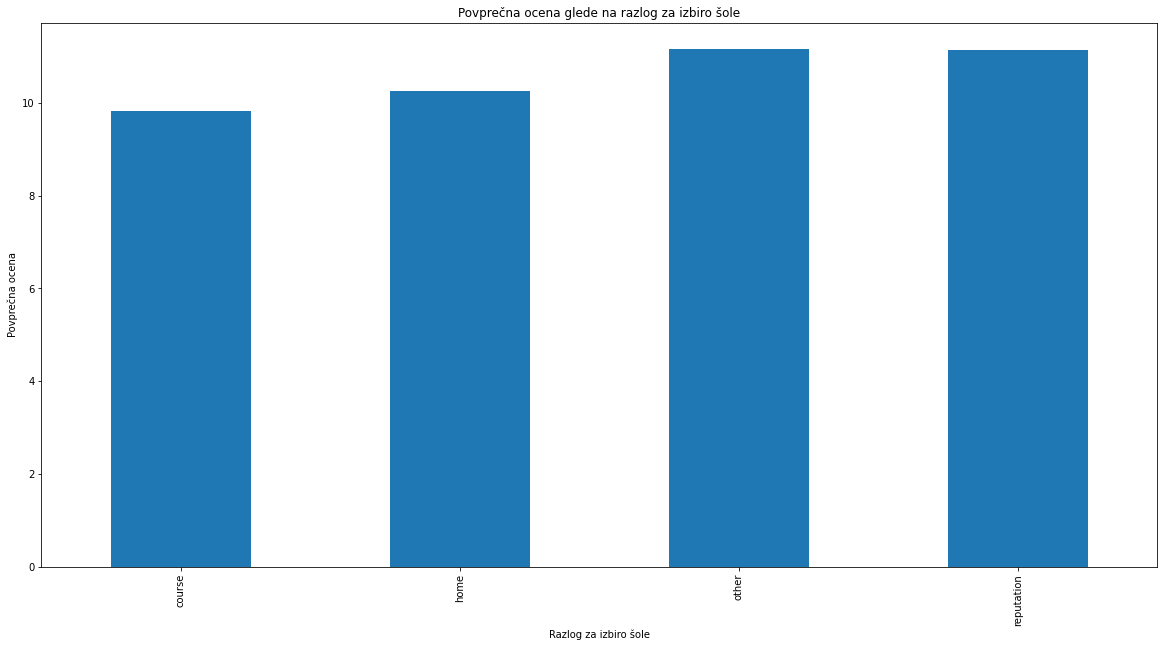

In [17]:
%store -r reason

plt.figure(figsize=(20,10))
reason.plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Razlog za izbiro šole')
plt.title('Povprečna ocena glede na razlog za izbiro šole')

Pri analizi atributa "reason", ki predstavlja razloge za izbiro šole, opažamo, da ima ta atribut nekaj vpliva na končno oceno. Opazimo, da povprečna ocena nekoliko narašča pri študentih, ki so izbrali šolo zaradi predmeta (course) ali zaradi bližine doma (home), medtem ko je povprečna ocena najvišja pri študentih, ki so izbrali šolo zaradi njene dobre reputacije (reputation).

Ta vzorec nam lahko nakazuje, da študenti, ki so se odločili za šolo glede na predmet ali bližino doma, še vedno dosegajo relativno visoke povprečne ocene, vendar je najvišja povprečna ocena dosežena pri študentih, ki so izbrali šolo zaradi njene dobre reputacije.

Razlog za to lahko pripisujemo več dejavnikom. Študenti, ki so se odločili za šolo glede na predmet, morda kažejo večjo zavzetost in interes za specifično področje študija, kar lahko pozitivno vpliva na njihove rezultate. Študenti, ki so izbrali šolo zaradi bližine doma, pa morda imajo koristi od boljše dostopnosti do šole in manj potovanja, kar lahko poveča njihovo zavzetost in možnosti za uspeh.

Pomemben dejavnik pri najvišji povprečni oceni pri študentih, ki so izbrali šolo zaradi dobre reputacije, pa je lahko ugled šole in višja kakovost izobraževanja, ki spodbuja študente k boljšim rezultatom.

### Analiza podatkov za napovedovanje končne ocene predmeta

Pri izbiri metode Lasso za napovedovanje smo se odločili zaradi več razlogov. Lasso je ena od priljubljenih metod regularizacije, ki združuje prednosti regresije in selekcije atributov. S pomočjo Lasso metode smo želeli doseči več ciljev:

1. Zmanjšanje dimenzionalnosti: Lasso metoda lahko pomaga zmanjšati število atributov v modelu tako, da postavi nekatere koeficiente parametrov na nič. To pomeni, da lahko odstranimo manj pomembne ali irelevantne atribute, kar poenostavi model in poveča interpretabilnost rezultatov.

2. Preprečevanje prekomernega prileganja (overfittinga): Lasso uporablja L1 regularizacijo, ki prisili koeficiente parametrov k bližini nič. S tem se zmanjša prekomerno prileganje modela podatkom, kar povečuje njegovo splošno sposobnost napovedovanja na novih podatkih.

3. Identifikacija pomembnih atributov: Lasso metoda pomaga pri identifikaciji najbolj pomembnih atributov, ki vplivajo na napovedovanje ciljne spremenljivke. Atributi z nenadomestljivimi koeficienti v Lasso modelu se lahko štejejo za tiste, ki imajo močnejši vpliv na napovedno moč modela.

4. Optimizacija parametrov: Lasso metoda vključuje parametrov alpha, ki nadzira ravnovesje med zmanjševanjem dimenzionalnosti in ohranjanjem napovedne točnosti. Izbrali smo ustrezno vrednost alpha, ki najbolj zadovoljuje naše potrebe glede trade-offa med natančnostjo in poenostavitvijo modela.

Za našo specifično analizo smo se odločili za Lasso metodo, ker smo želeli ustvariti napovedni model, ki bi bil sposoben dobro napovedati ciljno spremenljivko (v našem primeru končno oceno) ob upoštevanju le najbolj pomembnih atributov in zmanjšanja tveganja prekomernega prileganja modela.

#### 1. Lasso regresija z G1 in G2

Najprej smo izvedli Lasso regresijo z uporabo atributov G1 in G2 poleg vseh ostalih. Rezultati so prikazani na spodnjem grafu.

Text(0.5, 1.0, 'Predvidena povprečna ocena glede na dejansko povprečno oceno')

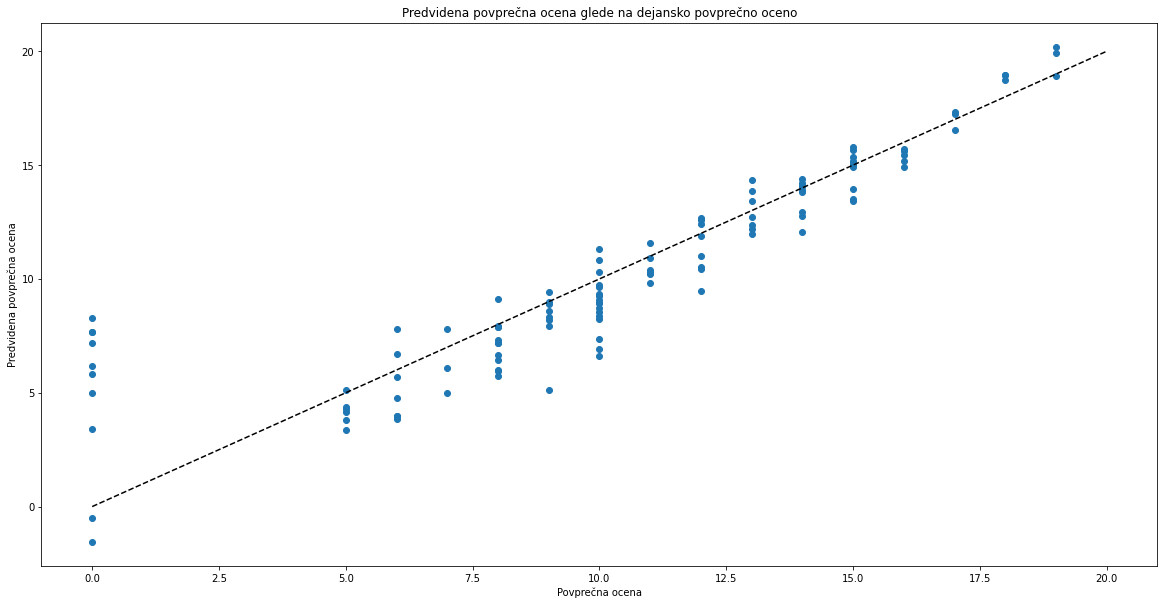

In [19]:
%store -r y_pred
%store -r y_test

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0, 20], '--k')
plt.axis('tight')
plt.xlabel('Povprečna ocena')
plt.ylabel('Predvidena povprečna ocena')
plt.title('Predvidena povprečna ocena glede na dejansko povprečno oceno')

In [22]:
%store -r mse
print('Mean Squared Error: ', mse)

Mean Squared Error:  4.22903040878447


MSE (Mean Squared Error) v vrednosti 4.22903040878447 kaže na povprečno kvadratno napako med napovedanimi vrednostmi (končne ocene) in dejanskimi vrednostmi v testnem setu. Nižja vrednost MSE kaže na manjšo napako in boljšo natančnost modela.

V kontekstu atributov, to pomeni, da atributi, vključeni v model, imajo neko napovedno moč in vplivajo na končno oceno študentov. Atribute z večjim vplivom ali povezavo z napovedano spremenljivko (končno oceno) lahko štejemo za bolj pomembne ali relevantne pri napovedovanju končne ocene.

In [23]:
%store -r r_squared
print('R^2: ', r_squared)

R^2:  0.8076144932705505


Vrednost R^2 (R-squared) je 0.8076144932705505, kar pomeni, da naš model uspešno pojasnjuje približno 80,76% variabilnosti končne ocene (G3) s pomočjo uporabljenih atributov. Višja vrednost R^2 kaže na boljšo prilagoditev modela podatkom.

To pomeni, da naš model uspešno zajema večino variabilnosti končne ocene in ima dobro napovedno moč. Večji R^2 kaže, da so atributi, vključeni v model, pomembni in prispevajo k napovedovanju končne ocene.

In [24]:
%store -r scores
print('Cross validation scores: ', scores)

Cross validation scores:  [0.87199394 0.85349962 0.83617226 0.83319695 0.79570242]


Vrednosti cross validation (prečno preverjanje) [0.87199394, 0.85349962, 0.83617226, 0.83319695, 0.79570242] predstavljajo rezultate ocenjevanja napovedne moči modela s pomočjo prečnega preverjanja s 5-fold metodo. Pri tej metodi se podatki razdelijo na 5 delov (foldov) in model se izgradi in preveri 5-krat, pri čemer se vsakič uporabi drug del podatkov kot testni set.

Vrednosti cross validation predstavljajo natančnost modela pri napovedovanju končne ocene na različnih podmnožicah podatkov. Višje vrednosti kažejo na boljšo napovedno moč modela, saj se model uspešno prilagaja različnim delom podatkov.

V našem primeru imamo povprečno vrednost cross validationa približno 0.838, kar kaže na relativno dobro napovedno moč modela. To pomeni, da je model sposoben napovedovati končno oceno z visoko natančnostjo na različnih delih podatkov.

In [27]:
%store -r top_predictors

print('Najboljši napovedovalci: \n', top_predictors)

Najboljši napovedovalci: 
 G2               0.976437
famrel           0.238806
G1               0.167341
reason_home      0.137230
age              0.135308
failures         0.097388
activities_no    0.075344
Fjob_other       0.045065
goout            0.043732
absences         0.037035
dtype: float64


Pri analizi prediktorjev se osredotočamo na njihov vpliv na napovedovanje končne ocene (G3). Na podlagi podatkov, ki ste jih navedli, lahko opazimo naslednje:

1. G2 (ocena v drugem semestru) ima visok koeficient 0.976437, kar pomeni, da ima najmočnejši pozitiven vpliv na končno oceno. To ni presenetljivo, saj je ocena v drugem semestru tesno povezana z oceno na koncu šolskega leta.

2. Famrel (družinski odnosi) ima koeficient 0.238806, kar kaže na njegov pozitiven vpliv na končno oceno. To pomeni, da boljši družinski odnosi so povezani z višjo končno oceno študenta.

3. G1 (ocena v prvem semestru) ima koeficient 0.167341, kar kaže na pozitiven vpliv na končno oceno. Ocena v prvem semestru je lahko pomemben pokazatelj uspeha študenta skozi celotno šolsko leto.

4. Reason_home (izbira šole zaradi domačega okolja) ima koeficient 0.137230, kar kaže na pozitiven vpliv na končno oceno. Izbiro šole zaradi domačega okolja lahko povežemo z večjo motivacijo in podporo študenta.

5. Age (starost) ima koeficient 0.135308, kar kaže na pozitiven vpliv na končno oceno. Morda starejši študenti kažejo večjo zrelost in boljše obvladovanje šolskih obveznosti.

6. Failures (neuspehi) ima koeficient 0.097388, kar kaže na njegov pozitiven vpliv na končno oceno. To pomeni, da manj neuspehov v prejšnjih letih študija lahko vodi do višje končne ocene.

7. Activities_no (pomanjkanje aktivnosti) ima koeficient 0.075344, kar kaže na njegov pozitiven vpliv na končno oceno. Sodelovanje v različnih aktivnostih izven šole lahko prispeva k boljšemu šolskemu uspehu.

8. Fjob_other (drugo delo starša) ima koeficient 0.045065, kar kaže na njegov pozitiven vpliv na končno oceno. Delo starša v drugem poklicu lahko prispeva k večji finančni stabilnosti in boljši podpori študenta.

9. Goout (izhajanje) ima koeficient 0.043732, kar kaže na pozitiven vpliv na končno oceno. Morda zmerno izhajanje lahko vodi v boljše uravnoteženje med socialnim življenjem in šolskimi obeznosti

10. Absences (izostanki) ima koeficient 0.037035, kar kaže na njihov pozitiven vpliv na končno oceno. Manjši število izostankov je povezano z boljšo končno oceno.

#### 2. Lasso regresija brez G1, G2

Nato smo izvedli Lasso regresijo brez atributov G1 in G2. Rezultati so prikazani na spodnjem grafu.

Text(0.5, 1.0, 'Predvidena povprečna ocena glede na dejansko povprečno oceno')

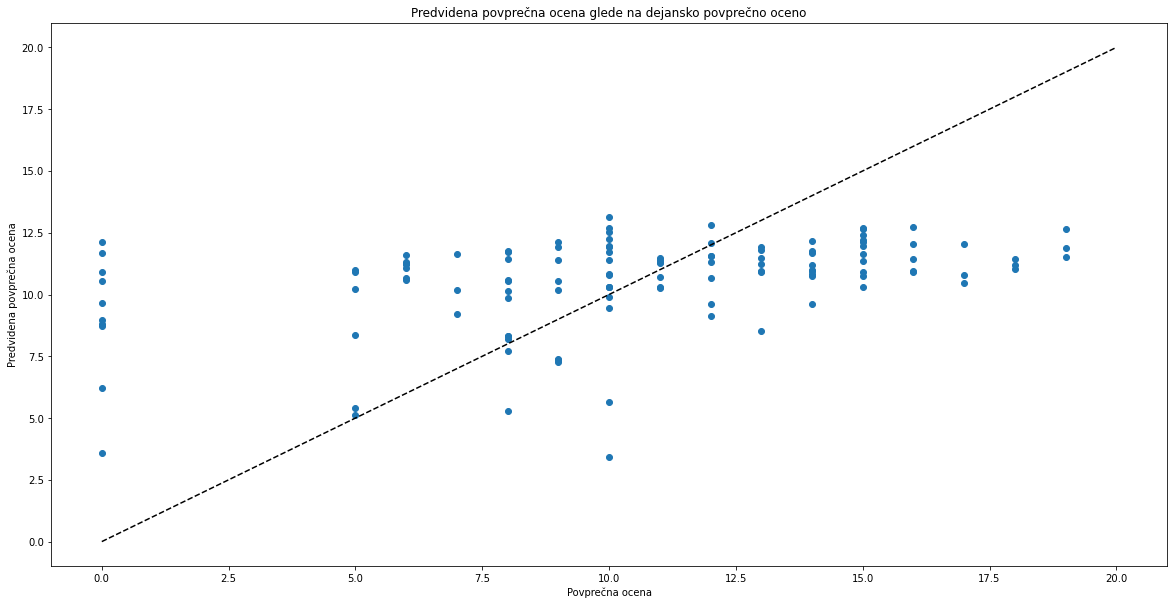

In [28]:
%store -r y_pred2
%store -r y_test2

plt.figure(figsize=(20,10))
plt.scatter(y_test2, y_pred2)
plt.plot([0, 20], [0, 20], '--k')
plt.axis('tight')
plt.xlabel('Povprečna ocena')
plt.ylabel('Predvidena povprečna ocena')
plt.title('Predvidena povprečna ocena glede na dejansko povprečno oceno')

In [29]:
%store -r mse2
print('Mean Squared Error: ', mse2)

Mean Squared Error:  18.304584429330678


Vrednost MSE (Mean Squared Error) je 18.304584429330678, pri čemer smo izključili atribute G1 in G2 iz modela. MSE je mera za oceno napovedne natančnosti modela, kjer nižje vrednosti MSE kažejo na boljšo natančnost modela pri napovedovanju končne ocene.

V tem primeru, ko smo izključili atribute G1 in G2, je vrednost MSE nekoliko višja v primerjavi s prejšnjim modelom, v katerem smo vključili tudi te ocene semestrov. To pomeni, da izključitev atributov G1 in G2 vpliva na nekoliko manjšo natančnost modela pri napovedovanju končne ocene.

In [30]:
%store -r r_squared2
print('R^2: ', r_squared2)

R^2:  0.16729453077615675


Vrednost R^2 (določenost koeficienta) je 0.16729453077615675, pri čemer smo izključili atribute G1 in G2 iz modela. R^2 je mera, ki nam pove, kolikšen delež variabilnosti odvisne spremenljivke (končna ocena) je razložen s pomočjo neodvisnih spremenljivk v modelu. Vrednost R^2 se giblje med 0 in 1, pri čemer višje vrednosti kažejo na boljšo sposobnost modela pri razlaganju variabilnosti odvisne spremenljivke.

V tem primeru, ko smo izključili atribute G1 in G2, je vrednost R^2 relativno nizka (0.16729453077615675). To pomeni, da neodvisne spremenljivke vključene v model brez atributov G1 in G2 le delno pojasnjujejo variabilnost končne ocene. Večji delež variabilnosti ostaja nepojasnjen.

Iz tega lahko sklepamo, da atributi G1 in G2, ki predstavljajo ocene semestrov, v modelu prinašajo pomembne informacije in imajo velik vpliv na napovedovanje končne ocene. Izključitev teh atributov vpliva na zmanjšanje sposobnosti modela pri razlaganju variabilnosti končne ocene, kar se odraža v nižji vrednosti R^2.

In [31]:
%store -r scores2
print('Cross validation scores: ', scores2)

Cross validation scores:  [ 0.16957412 -0.00716116  0.08222934  0.16458812  0.05769982]


Rezultati prečnega preverjanja (cross validation) so naslednji: [0.16957412, -0.00716116, 0.08222934, 0.16458812, 0.05769982]. Prečno preverjanje se uporablja za oceno splošne napovedne uspešnosti modela. Pri tem se podatki razdelijo na več delov (v tem primeru 5 delov) in model se preizkusi na različnih kombinacijah učnih in testnih podatkov.

V tem primeru, ko smo izključili atribute G1 in G2, so rezultati prečnega preverjanja precej razpršeni. Nekateri rezultati so pozitivni (0.16957412, 0.08222934, 0.16458812), kar kaže na neko stopnjo napovedne uspešnosti modela. Vendar so nekateri rezultati tudi negativni (-0.00716116, 0.05769982), kar pomeni, da model ni uspešen pri napovedovanju končne ocene v teh specifičnih kombinacijah prečnega preverjanja.

Razpršeni rezultati kažejo, da izključitev atributov G1 in G2 močno vpliva na napovedno uspešnost modela. 

In [32]:
%store -r top_predictors2

print('Najboljši napovedovalci: \n', top_predictors2)

Najboljši napovedovalci: 
 failures       1.779936
Mjob_health    0.630614
romantic_no    0.625521
famsup_no      0.622811
paid_no        0.564949
goout          0.396073
Medu           0.390354
sex_F          0.356134
studytime      0.225050
higher_no      0.211783
dtype: float64


Najboljši napovedovalci (po pomembnosti) za končno oceno so naslednji:

1. failures (1.779936): Ta atribut kaže na število neuspehov študenta. Večji vrednosti tega atributa so povezane z nižjimi ocenami. Zato je to pomemben napovedovalec, kjer večje število neuspehov kaže na nižje ocene.

2. Mjob_health (0.630614): Ta atribut predstavlja poklic matere, kjer je "health" povezan z zdravstvenim poklicem. Študenti, katerih matere imajo zdravstveni poklic, imajo v povprečju nekoliko višje ocene.

3. romantic_no (0.625521): Ta atribut označuje ali študent ima romantično razmerje ali ne. Vrednost "no" kaže, da študent nima romantičnega razmerja. Iz rezultata je razvidno, da tisti študenti, ki niso v romantičnih razmerjih, imajo v povprečju nekoliko višje ocene.

4. famsup_no (0.622811): Ta atribut označuje, ali študent prejema šolsko podporo s strani družine. Vrednost "no" kaže, da študent ne prejema podpore. Rezultat kaže, da tisti študenti, ki ne prejemajo šolske podpore, imajo v povprečju nekoliko višje ocene.

5. paid_no (0.564949): Ta atribut označuje, ali študent prejema dodatne plačane ure. Vrednost "no" kaže, da študent ne prejema plačanih ur. Izsledki kažejo, da tisti študenti, ki ne prejemajo plačanih ur, imajo v povprečju nekoliko višje ocene.

6. goout (0.396073): Ta atribut predstavlja število prostih aktivnosti, v katere se vključuje študent. Večje vrednosti tega atributa so povezane z nižjimi ocenami. To kaže, da ima večje število prostih aktivnosti lahko negativen vpliv na študentovo uspešnost.

7. Medu (0.390354): Ta atribut predstavlja izobrazbo matere, kjer višje vrednosti pomenijo višjo izobrazbo. Rezultat kaže, da imajo študenti, katerih matere imajo višjo izobrazbo, v povprečju nekoliko višje ocene.

8. sex_F (0.356134): Ta atribut označuje spol študenta, pri čemer "F" predstavlja ženski spol. Rezultat kaže, da imajo ženski študenti v povprečju nekoliko višje ocene v primerjavi z moškimi študenti.

9. studytime (0.225050): Ta atribut predstavlja tedenski čas, ki ga študent namenja študiju. Večje vrednosti tega atributa so povezane z višjimi ocenami. To pomeni, da večji čas, namenjen študiju, pozitivno vpliva na študentovo uspešnost.

10. higher_no (0.211783): Ta atribut označuje, ali študent namerava nadaljevati izobraževanje po srednji šoli. Vrednost "no" kaže, da študent ne namerava nadaljevati. Rezultat kaže, da tisti študenti, ki ne nameravajo nadaljevati izobraževanja, imajo v povprečju nekoliko nižje ocene.

## Zaključek

Zaključek analize podatkov kaže, da obstajajo nekateri pomembni dejavniki, ki vplivajo na končno oceno študentov. Naša analiza je pokazala, da atributi, kot so število neuspehov (failures), poklic matere (Mjob_health), prisotnost romantičnega razmerja (romantic_no), prejemanje družinske podpore (famsup_no) in prejemanje plačanih ur (paid_no) imajo pomemben vpliv na končno oceno.

Poleg tega smo opazili, da študenti, ki imajo manj prostega časa za aktivnosti (nižje vrednosti atributa goout), višje izobražene matere (višje vrednosti atributa Medu) in ženske študentke (atribut sex_F) imajo v povprečju višje ocene.

Prav tako smo ugotovili, da večji čas, namenjen študiju (atribut studytime) in nameravanje nadaljevanja izobraževanja po srednji šoli (atribut higher_no) pozitivno vplivata na študentovo uspešnost.

Vendar je treba poudariti, da izključitev atributov G1 in G2 vodi do manjšega MSE in slabše razlage variabilnosti ocene (nižji R^2). To pomeni, da so ocene študentov v prejšnjih semestrih (G1 in G2) pomemben dejavnik pri napovedovanju končne ocene.

Skupno gledano, naša analiza podatkov je razkrila nekatere pomembne dejavnike, ki vplivajo na končno oceno študentov. Razumevanje teh dejavnikov nam lahko pomaga pri identifikaciji študentov, ki potrebujejo dodatno podporo in usmerjanje za izboljšanje njihove uspešnosti.